# Introduction


**What?** Advanced uses of SHAP values



# Brief description of SHAP Values


- Consider an ultra-simple model: $y = 4 * x1 + 2 * x2$
- If $x1$ takes the value 2, instead of a baseline value of 0, then our SHAP value for $x1$ would be 8 (from 4 times 2).



# Import modules

In [3]:
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Import dataset

In [4]:
data = pd.read_csv('../DATASETS/FIFA_2018_Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

# Summary plot

    
- SHAP summary plots give us a birds-eye view of feature importance and what is driving it. 
- Vertical location shows what feature it is depicting
- Color shows whether that feature was high or low for that row of the dataset
- Horizontal location shows whether the effect of that value caused a higher or lower prediction.
- For example, the point in the upper left was for a team that scored few goals, reducing the prediction by 0.25.  



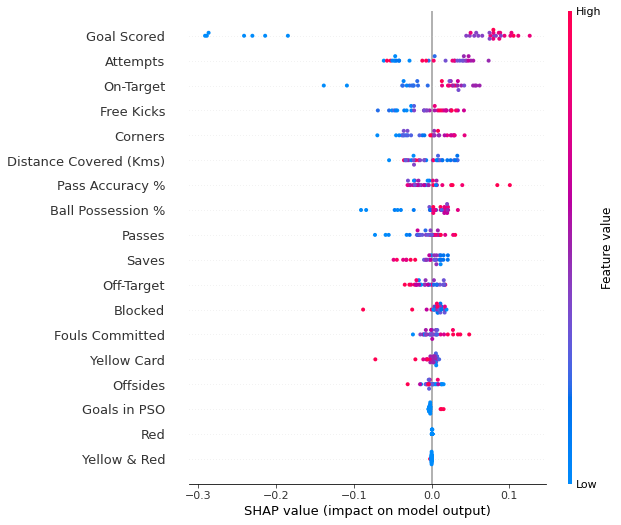

In [5]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)

# SHAP Dependence Contribution Plots

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


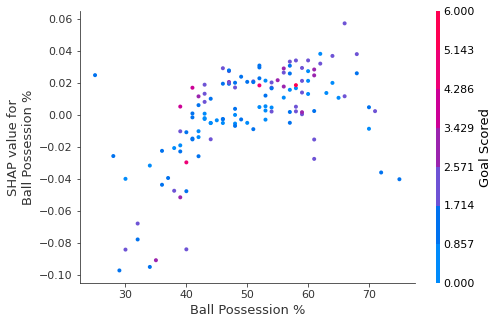

In [6]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('Ball Possession %', shap_values[1], X, interaction_index="Goal Scored")



We've previously used Partial Dependence Plots to show how a single feature impacts predictions. These are insightful and relevant for many real-world use cases. Plus, with a little effort, they can be explained to a non-technical audience.

But there's a lot they don't show.  For instance, what is the distribution of effects? Is the effect of having a certain value pretty constant, or does it vary a lot depending on the values of other feaures. SHAP dependence contribution plots provide a similar insight to PDP's, but they add a lot more detail.

![Imgur](https://i.imgur.com/uQ2JmBm.png)

Start by focusing on the shape, and we'll come back to color in a minute.  Each dot represents a row of the data. The horizontal location is the actual value from the dataset, and the vertical location shows what having that value did to the prediction.  The fact this slopes upward says that the more you possess the ball, the higher the model's prediction is for winning the *Man of the Match* award.

The spread suggests that other features must interact with Ball Possession %.  For example, here we have highlighted two points with similar ball possession values. That value caused one prediction to increase, and it caused the other prediction to decrease.

![Imgur](https://i.imgur.com/tFzp6jc.png)

For comparison, a simple linear regression would produce plots that are perfect lines, without this spread.

This suggests we delve into the interactions, and the plots include color coding to help do that. While the primary trend is upward, you can visually inspect whether that varies by dot color. 

Consider the following very narrow example for concreteness.

![Imgur](https://i.imgur.com/NVB3eNW.png)

These two points stand out spatially as being far away from the upward trend. They are both colored purple, indicating the team scored one goal. You can interpret this to say **In general, having the ball increases a team's chance of having their player win the award. But if they only score one goal, that trend reverses and the award judges may penalize them for having the ball so much if they score that little.**

Outside of those few outliers, the interaction indicated by color isn't very dramatic here. But sometimes it will jump out at you.




# References


- https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values

